## Homework 10 - Data visualization using matplotlib
1) Using matplotlib, generate visualizations for the Table 2 in the paper.

Perform all steps of loading the data and generating the Table 2. Choose appropriate visualization and use appropriate labels in the visualization.

The visualization must stand on its own. Do not ask the readers to refer to the table. Include Legends, Axis labels.

2) Using matplotlib, generate visualization for Table 3 - HbA1C only

Choose appropriate visualization and use appropriate labels in the visualization to illustrate the 4 columns in one figure.

The visualization must stand on its own. Do not ask the readers to refer to the table. Include Legends, Axis labels.

### Package import and data preprocess
1. The preliminary dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent, an assumption of the logistic regression model. We thus used only one encounter per patient; in particular, we considered only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days. 
2. Additionally, we removed all encounters that resulted in either discharge to a hospice or patient death, to avoid biasing our analysis. From "IDs_mapping.csv" find that for "discharge_disposition_id", if the code is 11, 13, 14, 19, 20 and 21 then this patient discharge to a hospice or death.

After performing the above-described operations, we were left with 69973 encounters that constituted the final dataset for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch #For the first pie chart
from matplotlib import cm

In [2]:
df = pd.read_csv('diabetic_data.csv')

#1.Filter only the first encounter for each patient
pt = df.groupby('patient_nbr')['encounter_id'].first().reset_index()
df_pt = df[df['encounter_id'].isin(pt['encounter_id'].drop_duplicates().tolist())]
#print(len(df_pt)) #length is 71518 now, means there are 71518 individual patients

#2. Remove all encounters that resulted in discharge to a hospice 
data = df_pt[(df_pt['discharge_disposition_id'] != 11) & (df_pt['discharge_disposition_id'] != 13)
           & (df_pt['discharge_disposition_id'] != 14) & (df_pt['discharge_disposition_id'] != 19)
           & (df_pt['discharge_disposition_id'] != 20) & (df_pt['discharge_disposition_id'] != 21)]
#print(len(data)) #length is 69973 now.

### Table 2 visualization
#### Row index
- icd9 codes
- Num_encounter (Number of encounters): count of encounter_id
- Percentage (% of the encounters): count of patient_nbr for (No test was performed, Result was high and the diabetic medication was changed, Result was high but the diabetic medication was not changed, Normal result of the test) / count of encounter_id
- Description

#### Column index
- Circulatory (icd9: 390–459, 785): with value 390-459 and 785 of diag_1
- Respiratory (icd9: 460–519, 786): with value 460–519 and 786 of diag_1
- Digestive (icd9: 520–579, 787): with value 520–579 and 787 of diag_1
- Diabetes (icd9: 250.xx): with value 250.xx of diag_1
- Injury (icd9: 800–999): with value 800–999 of diag_1
- Musculoskeletal (icd9: 710–739): with value 710–739 of diag_1
- Genitourinary (icd9: 580–629, 788): with value 580–629 and 788 of diag_1
- Neoplasms (icd9: 140–239): with value 140–239 of diag_1
- Other: other values (icd9: 780, 781, 784, 790–799; 240–279, without 250; 680–709, 782; 001–139; 290–319; E–V; 280–289; 320–359; 630–679; 360–389; 740–759) of diag_1

In [3]:
pr = data[['encounter_id','patient_nbr','diag_1']].drop_duplicates()
t_enc = len(pr) #count of encounter_id 

tb1 = pd.DataFrame(columns=['icd9_codes', 'Num_encounter', 'Percentage', 'Description'], 
                     index=['Circulatory', 'Respiratory', 'Digestive', 'Diabetes', 'Injury', 'Musculoskeletal',
                            'Genitourinary', 'Neoplasms', 'Other/Other_symptoms', 'Other/Endocrine', 'Other/Skin',
                            'Other/Infectious', 'Other/Mental', 'Other/External', 'Other/Blood', 'Other/Nervous',
                            'Other/Complications', 'Other/Sense_organs', 'Other/Congenital'])

In [4]:
#Handle E–V values first
pr_le = pr[(pr['diag_1'].str.startswith('V')) | (pr['diag_1'].str.startswith('E'))] #Values start with a letter
#Then filter 250.xx
di = pr[(pr['diag_1'].str.startswith('250'))]

In [5]:
#Prepare for filter in the next step
pr_na = pr[pr['diag_1'] == '?'] 
pr1 = pd.concat([pr_le, pr_na, di]).dropna()
prim = pr[~(pr['encounter_id'].isin(pr1['encounter_id'].drop_duplicates().tolist()))]
prim['diag_1'] = prim['diag_1'].astype(int)

/Users/christy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
#Numbers in the table
pr1 = len(prim[((prim['diag_1'] >= 390) & (prim['diag_1'] <= 459)) | (prim['diag_1'] == 785)].drop_duplicates())
pr2 = len(prim[((prim['diag_1'] >= 460) & (prim['diag_1'] <= 519)) | (prim['diag_1'] == 786)].drop_duplicates())
pr3 = len(prim[((prim['diag_1'] >= 520) & (prim['diag_1'] <= 579)) | (prim['diag_1'] == 787)].drop_duplicates())
pr4 = len(prim[((prim['diag_1'] >= 800) & (prim['diag_1'] <= 999))].drop_duplicates())
pr5 = len(prim[((prim['diag_1'] >= 710) & (prim['diag_1'] <= 739))].drop_duplicates())
pr6 = len(prim[((prim['diag_1'] >= 580) & (prim['diag_1'] <= 629)) | (prim['diag_1'] == 788)].drop_duplicates())
pr7 = len(prim[((prim['diag_1'] >= 140) & (prim['diag_1'] <= 239))].drop_duplicates())
pr8 = len(prim[((prim['diag_1'] >= 790) & (prim['diag_1'] <= 799)) | (prim['diag_1'] == 780) 
              | (prim['diag_1'] == 781) | (prim['diag_1'] == 784)].drop_duplicates())
pr9 = len(prim[((prim['diag_1'] >= 240) & (prim['diag_1'] <= 249)) 
              |((prim['diag_1'] >= 251) & (prim['diag_1'] <= 279))].drop_duplicates())
pr10 = len(prim[((prim['diag_1'] >= 680) & (prim['diag_1'] <= 709)) | (prim['diag_1'] == 782)].drop_duplicates())
pr11 = len(prim[((prim['diag_1'] >= 1) & (prim['diag_1'] <= 139))].drop_duplicates())
pr12 = len(prim[((prim['diag_1'] >= 290) & (prim['diag_1'] <= 319))].drop_duplicates())
pr13 = len(prim[((prim['diag_1'] >= 280) & (prim['diag_1'] <= 289))].drop_duplicates())
pr14 = len(prim[((prim['diag_1'] >= 320) & (prim['diag_1'] <= 359))].drop_duplicates())
pr15 = len(prim[((prim['diag_1'] >= 630) & (prim['diag_1'] <= 679))].drop_duplicates())
pr16 = len(prim[((prim['diag_1'] >= 360) & (prim['diag_1'] <= 389))].drop_duplicates())
pr17 = len(prim[((prim['diag_1'] >= 740) & (prim['diag_1'] <= 759))].drop_duplicates())

In [7]:
#Percentages in the table
ele_1 = [pr1,pr2,pr3,len(di),pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,len(pr_le),pr13,pr14,pr15,pr16,pr17]
ele_2 = []
for i in range(len(ele_1)):
    ele_2.append(str(round(ele_1[i] / t_enc * 100,1)) + '%')

for i in range(len(tb1)):
    tb1.iloc[i][1] = ele_1[i]
    tb1.iloc[i][2] = ele_2[i]

In [8]:
#Description
tb1.iloc[0][0] = '390–459, 785'
tb1.iloc[0][3] = 'Diseases of the circulatory system'

tb1.iloc[1][0] = '460–519, 786'
tb1.iloc[1][3] = 'Diseases of the respiratory system'

tb1.iloc[2][0] = '520–579, 787'
tb1.iloc[2][3] = 'Diseases of the digestive system'

tb1.iloc[3][0] = '250.xx'
tb1.iloc[3][3] = 'Diabetes mellitus'

tb1.iloc[4][0] = '800–999'
tb1.iloc[4][3] = 'Injury and poisoning'

tb1.iloc[5][0] = '710-739'
tb1.iloc[5][3] = 'Diseases of the musculoskeletal system and connective tissue'

tb1.iloc[6][0] = '580–629, 788'
tb1.iloc[6][3] = 'Diseases of the genitourinary system'

tb1.iloc[7][0] = '140–239'
tb1.iloc[7][3] = 'Neoplasms'

tb1.iloc[8][0] = '780, 781, 784, 790–799'
tb1.iloc[8][3] = 'Other symptoms, signs, and ill-defined conditions'

tb1.iloc[9][0] = '240–279, without 250'
tb1.iloc[9][3] = 'Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes'

tb1.iloc[10][0] = '680–709, 782'
tb1.iloc[10][3] = 'Diseases of the skin and subcutaneous tissue'

tb1.iloc[11][0] = '001–139'
tb1.iloc[11][3] = 'Infectious and parasitic diseases'

tb1.iloc[12][0] = '290–319'
tb1.iloc[12][3] = 'Mental disorders'

tb1.iloc[13][0] = 'E-V'
tb1.iloc[13][3] = 'External causes of injury and supplemental classification'

tb1.iloc[14][0] = '280–289'
tb1.iloc[14][3] = 'Diseases of the blood and blood-forming organs'

tb1.iloc[15][0] = '320–359'
tb1.iloc[15][3] = 'Diseases of the nervous system'

tb1.iloc[16][0] = '630–679'
tb1.iloc[16][3] = 'Complications of pregnancy, childbirth, and the puerperium'

tb1.iloc[17][0] = '360–389'
tb1.iloc[17][3] = 'Diseases of the sense organs'

tb1.iloc[18][0] = '740–759'
tb1.iloc[18][3] = 'Congenital anomalies'

#### Table 2 and visualization

In [9]:
tb1

,icd9_codes,Num_encounter,Percentage,Description
Circulatory,"390–459, 785",21384,30.6%,Diseases of the circulatory system
Respiratory,"460–519, 786",9486,13.6%,Diseases of the respiratory system
Digestive,"520–579, 787",6487,9.3%,Diseases of the digestive system
Diabetes,250.xx,5748,8.2%,Diabetes mellitus
Injury,800–999,4694,6.7%,Injury and poisoning
Musculoskeletal,710-739,4064,5.8%,Diseases of the musculoskeletal system and con...
Genitourinary,"580–629, 788",3440,4.9%,Diseases of the genitourinary system
Neoplasms,140–239,2538,3.6%,Neoplasms
Other/Other_symptoms,"780, 781, 784, 790–799",1763,2.5%,"Other symptoms, signs, and ill-defined conditions"
Other/Endocrine,"240–279, without 250",1850,2.6%,"Endocrine, nutritional, and metabolic diseases..."


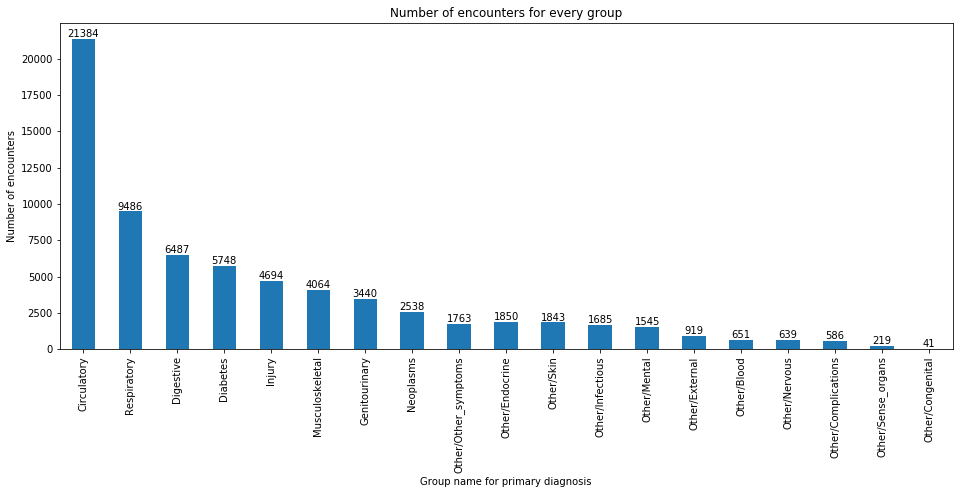

In [10]:
#bar chart
fig, ax = plt.subplots(figsize=(16, 6)) #set size
ax.set_xlabel('Group name for primary diagnosis')
ax.set_ylabel('Number of encounters')
tb1.Num_encounter.plot(kind='bar', title='Number of encounters for every group')

#show nubmers of every bar
x=np.arange(len(tb1.index)) 
y=np.array(list(tb1['Num_encounter']))
for a,b in zip(x, y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom')
    
plt.show()

In [11]:
#Bar of pie
#prepare
ratios = [] #labels for the pie
total = 0
for i in range(8,19):
    total = total + ele_1[i]
ratios.append(total/t_enc)

for i in range(8):
    ratios.append(ele_1[i]/t_enc)

num = [] #label text for the pie
num.append(total)
for i in range(8):
    num.append(ele_1[i])    

ratios1 = [] #labels for the bar
for i in range(8,19):
    ratios1.append(ele_1[i]/total)

labels = ['Other', 'Circulatory', 'Respiratory', 'Digestive', 'Diabetes', 'Injury', 'Musculoskeletal',
          'Genitourinary', 'Neoplasms']

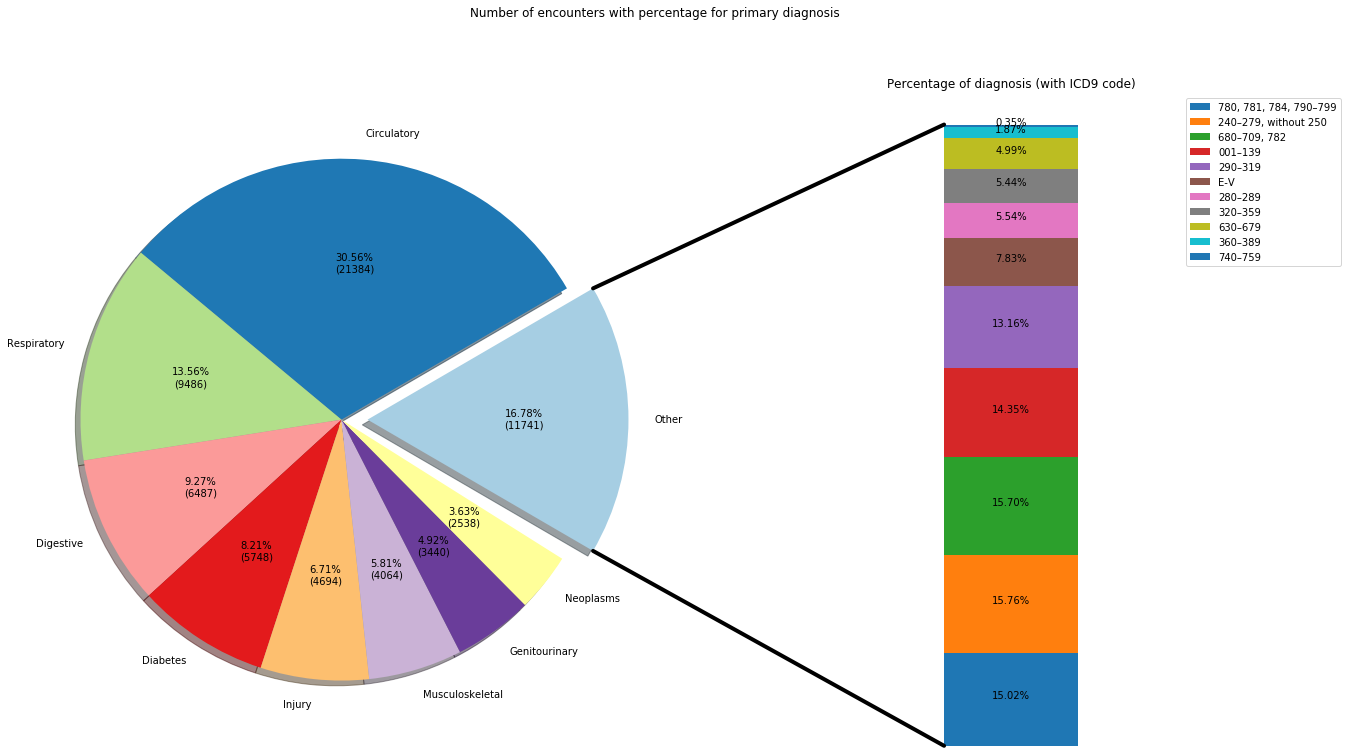

In [12]:
# make figure and assign axis objects
fig = plt.figure(figsize=(24, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)+391 #add the "?" values back
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct
colors = cm.Paired(np.arange(len(ratios))/len(ratios))

ax1.pie(ratios, autopct=make_autopct(num), startangle=angle,
        labels=labels, explode=explode, shadow=True, colors=colors)

# bar chart parameters
xpos = 0
bottom = 0
width = .2

for j in range(len(ratios1)):
    height = ratios1[j]
    ax2.bar(xpos, height, width, bottom= bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() * 100), ha='center')

ax2.set_title('Percentage of diagnosis (with ICD9 code)')
ax2.legend(('780, 781, 784, 790–799', '240–279, without 250', '680–709, 782', '001–139',
            '290–319', 'E-V', '280–289', '320–359', '630–679', '360–389', '740–759'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
 
fig.suptitle('Number of encounters with percentage for primary diagnosis')
plt.show()

### Table 3 - HbA1C visualization
#### Row index
- Num_encounter （Number of encounters）: count of encounter_id
- Percentage (% of the population): count of patient_nbr for (No test was performed, Result was high and the diabetic medication was changed, Result was high but the diabetic medication was not changed, Normal result of the test) / count of patient_nbr
- Readm_num_encounter (Readmitted Number of encounters): count of "<30"and ">30" values of readmitted encounter_id
- Readm_percentage (Readmitted % in group): count of "<30"and ">30" values of readmitted patient_nbr for (No test was performed, Result was high and the diabetic medication was changed, Result was high but the diabetic medication was not changed, Normal result of the test) / count of "<30"and ">30" values of readmitted patient_nbr

#### Column index
- No_test (No test was performed): "None" value of A1Cresult
- High_change (Result was high and the diabetic medication was changed): “>8” value of A1Cresult, “Ch” value of change
- High_no_change (Result was high but the diabetic medication was not changed): “>8” value of A1Cresult, “No” value of change
- Normal (Normal result of the test): “Norm” value of A1Cresult

In [13]:
hb = data[['encounter_id','patient_nbr','A1Cresult','change','readmitted']]
hba1c = pd.DataFrame(columns=['Num_encounter', 'Percentage', 'Readm_num_encounter','Readm_percentage'], 
                     index=['No_test', 'High_change_medication', 'High_no_change_medication','Normal'])

#The first row of HbA1C table
hb11 = hb[['encounter_id','readmitted']][hb['A1Cresult'] == 'None'].drop_duplicates() 
hb13 = hb11['encounter_id'][hb11['readmitted'] == '<30'].drop_duplicates()
hba1c.iloc[0][0] = len(hb11)
hba1c.iloc[0][1] = str(round(len(hb11) / len(hb),3) * 100) + '%'
hba1c.iloc[0][2] = len(hb13)
hba1c.iloc[0][3] = str(round(len(hb13) / len(hb11) * 100,1)) + '%'

#The second row of HbA1C table
hb21 = hb[['encounter_id','readmitted']][hb['A1Cresult'] == '>8'][hb['change'] == 'Ch'].drop_duplicates() 
hb23 = hb21['encounter_id'][hb21['readmitted'] == '<30'].drop_duplicates()
hba1c.iloc[1][0] = len(hb21)
hba1c.iloc[1][1] = str(round(len(hb21) / len(hb) * 100,2)) + '%'
hba1c.iloc[1][2] = len(hb23)
hba1c.iloc[1][3] = str(round(len(hb23) / len(hb21) * 100,1)) + '%'

#The third row of HbA1C table
hb31 = hb[['encounter_id','readmitted']][hb['A1Cresult'] == '>8'][hb['change'] == 'No'].drop_duplicates()
hb33 = hb31['encounter_id'][hb31['readmitted'] == '<30'].drop_duplicates()
hba1c.iloc[2][0] = len(hb31)
hba1c.iloc[2][1] = str(round(len(hb31) / len(hb) * 100,1)) + '%'
hba1c.iloc[2][2] = len(hb33)
hba1c.iloc[2][3] = str(round(len(hb33) / len(hb31) * 100,1)) + '%'

#The last row of HbA1C table
hb41 = hb[['encounter_id','readmitted']][(hb['A1Cresult'] == 'Norm') | (hb['A1Cresult'] == '>7')].drop_duplicates()
hb43 = hb41['encounter_id'][hb41['readmitted'] == '<30'].drop_duplicates()
hba1c.iloc[3][0] = len(hb41)
hba1c.iloc[3][1] = str(round(len(hb41) / len(hb) * 100,1)) + '%'
hba1c.iloc[3][2] = len(hb43)
hba1c.iloc[3][3] = str(round(len(hb43) / len(hb41) * 100,1)) + '%'

/Users/christy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/christy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### Table 3 - HbA1C and visualization

In [14]:
hba1c

,Num_encounter,Percentage,Readm_num_encounter,Readm_percentage
No_test,57128,81.6%,5199,9.1%
High_change_medication,4058,5.8%,348,8.6%
High_no_change_medication,2181,3.1%,161,7.4%
Normal,6606,9.4%,569,8.6%


Text(0.5, 0.98, 'Categorical Plotting for different HbA1C values and medication change')

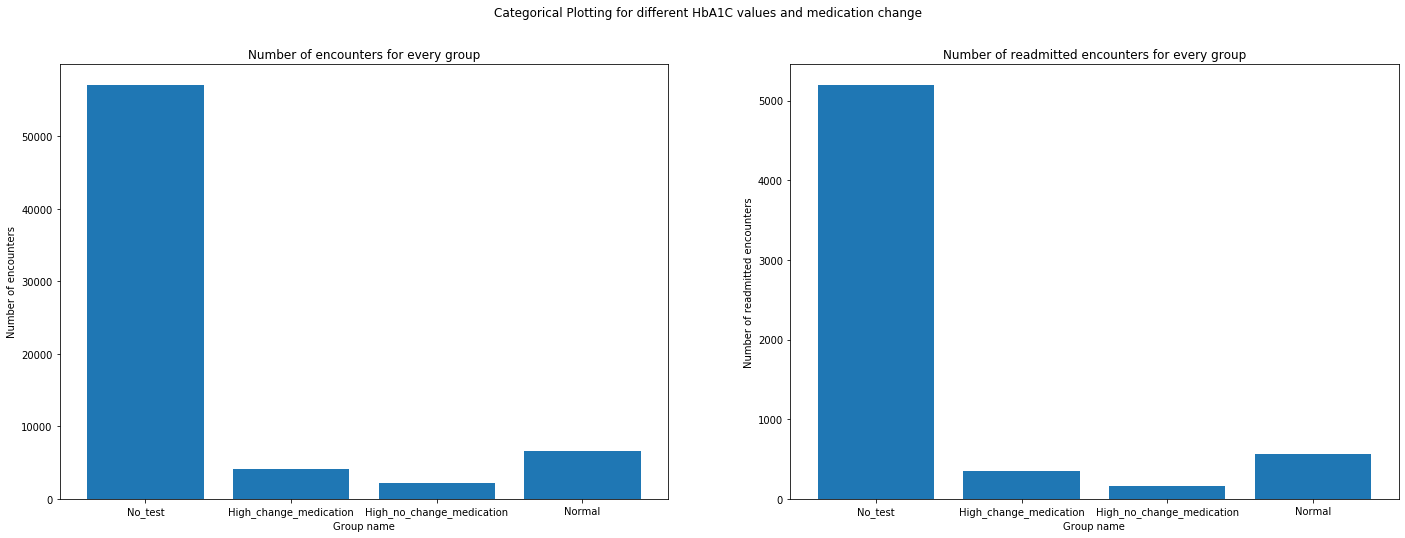

In [15]:
#Bar chart with subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 8)) #set size to make sure labels readable
axs[0].bar(hba1c.index, hba1c.Num_encounter)
axs[0].set_title('Number of encounters for every group')
axs[0].set_xlabel('Group name')
axs[0].set_ylabel('Number of encounters')

axs[1].bar(hba1c.index, hba1c.Readm_num_encounter)
axs[1].set_title('Number of readmitted encounters for every group')
axs[1].set_xlabel('Group name')
axs[1].set_ylabel('Number of readmitted encounters')

fig.suptitle('Categorical Plotting for different HbA1C values and medication change')

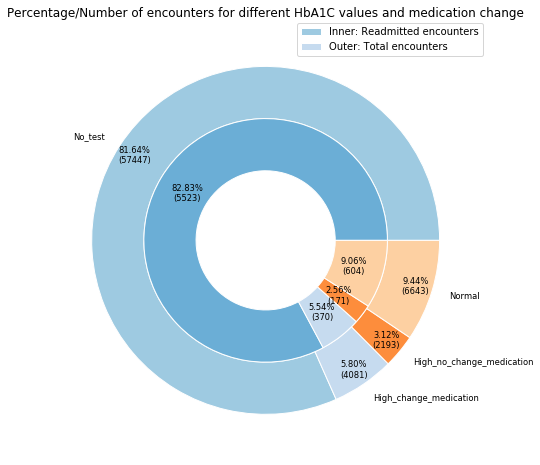

In [16]:
#Nested pie chart
fig, ax = plt.subplots(figsize=(16, 8))
#set parameters
size = 0.3

cmap = plt.get_cmap("tab20c")
inner_colors = cmap([1, 3, 5, 7])
outer_colors = cmap([2, 3, 5, 7])

#draw the plot
ax.pie(hba1c.Num_encounter, radius=1,colors=outer_colors, labels=hba1c.index, 
       autopct=make_autopct(hba1c.Num_encounter),textprops={'size': 'smaller'},
       pctdistance=0.9, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(hba1c.Readm_num_encounter, radius=1-size,colors=inner_colors,
       autopct=make_autopct(hba1c.Readm_num_encounter),textprops={'size': 'smaller'},
       pctdistance=0.75, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Percentage/Number of encounters for different HbA1C values and medication change')
plt.legend(['Inner: Readmitted encounters','Outer: Total encounters'],bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)
plt.show()

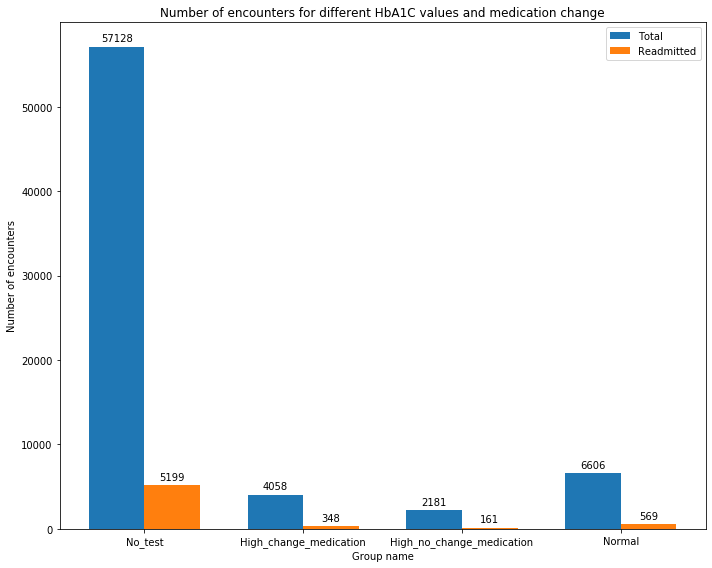

In [17]:
#grouped bar chart
x = np.arange(len(hba1c.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.bar(x - width/2, hba1c.Num_encounter, width, label='Total')
bar2 = ax.bar(x + width/2, hba1c.Readm_num_encounter, width, label='Readmitted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Group name')
ax.set_ylabel('Number of encounters')
ax.set_title('Number of encounters for different HbA1C values and medication change')
ax.set_xticks(x)
ax.set_xticklabels(hba1c.index)
ax.legend()

def autolabel(rects):
    """
    Attach a text label above each bar in *rects*, displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

fig.tight_layout()
plt.show()